In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn


In [6]:
import keras
from keras.applications.inception_v3 import InceptionV3
from keras.models import Model,load_model
conv_base =  InceptionV3(weights='imagenet',include_top=False,
                         input_shape=(256, 256, 3))
output = conv_base.layers[-1].output
output = keras.layers.Flatten()(output)
model_tl = Model(conv_base.input, output)
model_tl.trainable = False
for layer in model_tl.layers:
    layer.trainable = False
layers = [(layer, layer.name, layer.trainable) for layer in  
               model_tl.layers]
model_layers=pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])
print(model_layers) 


87924736/87910968 [==============================] - 0s 0us/step
                                            Layer Type           Layer Name  \
0    <keras.engine.input_layer.InputLayer object at...              input_1   
1    <keras.layers.convolutional.Conv2D object at 0...               conv2d   
2    <keras.layers.normalization.batch_normalizatio...  batch_normalization   
3    <keras.layers.core.activation.Activation objec...           activation   
4    <keras.layers.convolutional.Conv2D object at 0...             conv2d_1   
..                                                 ...                  ...   
307  <keras.layers.merge.Concatenate object at 0x7f...             mixed9_1   
308  <keras.layers.merge.Concatenate object at 0x7f...        concatenate_1   
309  <keras.layers.core.activation.Activation objec...        activation_93   
310  <keras.layers.merge.Concatenate object at 0x7f...              mixed10   
311  <keras.layers.core.flatten.Flatten object at 0...            

In [3]:
pip install -q pyyaml h5py 

In [4]:
import tensorflow
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display
import pandas as pd
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
test_size=200
batch_size=32
epochs=25

from google.colab import drive
drive.mount('/content/drive')
train_path = '/content/drive/MyDrive/Colab Notebooks/TestTrain_Color1/train'
test_path = '/content/drive/MyDrive/Colab Notebooks/TestTrain_Color1/test'
labels = os.listdir(train_path)
print(labels)
target_size=(256,256) #resize all images to 300x300


train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3,  
                                   rotation_range=50,
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2,
                                   horizontal_flip=True,
                                   brightness_range = [0.8, 1.2],
                                   fill_mode='nearest',        
                                   validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)
# The list of classes will be automatically inferred from the subdirectory names/structure under train_dir
train_generator = train_datagen.flow_from_directory(
                  train_path,
                  target_size=target_size,#  
                  batch_size=batch_size,
                  class_mode='categorical',
                  subset='training')
validation_generator = train_datagen.flow_from_directory(
                       train_path,
                       target_size=target_size,
                       batch_size=batch_size,
                       class_mode='categorical',
                       subset='validation')

Mounted at /content/drive
['D', 'A', 'C', 'B']
Found 2296 images belonging to 4 classes.
Found 572 images belonging to 4 classes.


In [7]:

from tensorflow.keras import layers

from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras import optimizers
# building a linear stack of layers with the sequential model
model =Sequential()
model.add(model_tl)
# hidden layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
# output layer
model.add(Dense(4, activation='softmax'))
# compiling the sequential model

learning_rate = 0.001
#epochs=2
opt= tensorflow.keras.optimizers.RMSprop(learning_rate=learning_rate )
model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer=opt, metrics=['accuracy'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 73728)             21802784  
                                                                 
 dense (Dense)               (None, 128)               9437312   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
Total params: 31,240,612
Trainable params: 9,437,828
Non-trainable params: 21,802,784
_________________________________________________________________
None


In [8]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
from keras.callbacks import *
filepath1='/content/drive/My Drive/MyCNN/epochs:{epoch:03d}-val_acc:{val_acc:.3f}.hdf5'
checkpoint = ModelCheckpoint(filepath1, 
                             monitor='val_acc', 
                             verbose=1,
                             save_best_only=False,
                             save_freq='epoch',     
                             mode='max')
callbacks_list = [checkpoint]

In [113]:
history = model.fit(
          train_generator,
          steps_per_epoch=train_generator.samples//batch_size,    
          validation_data=validation_generator,
          validation_steps=validation_generator.samples//batch_size,
          epochs=epochs,
          verbose=1,
          shuffle=True)
          #callbacks=callbacks_list)

Epoch 1/25
71/71 [==============================] - 69s 902ms/step - loss: 8.9944 - accuracy: 0.7319 - val_loss: 0.2310 - val_accuracy: 0.9301
Epoch 2/25
71/71 [==============================] - 91s 1s/step - loss: 0.7020 - accuracy: 0.8251 - val_loss: 2.0219 - val_accuracy: 0.6875
Epoch 3/25
71/71 [==============================] - 63s 881ms/step - loss: 0.9102 - accuracy: 0.8794 - val_loss: 0.1234 - val_accuracy: 0.9779
Epoch 4/25
71/71 [==============================] - 63s 882ms/step - loss: 0.3240 - accuracy: 0.9267 - val_loss: 1.0659 - val_accuracy: 0.8768
Epoch 5/25
71/71 [==============================] - 62s 870ms/step - loss: 0.3380 - accuracy: 0.9342 - val_loss: 0.2962 - val_accuracy: 0.9504
Epoch 6/25
71/71 [==============================] - 63s 889ms/step - loss: 0.1700 - accuracy: 0.9532 - val_loss: 0.0930 - val_accuracy: 0.9779
Epoch 7/25
71/71 [==============================] - 62s 879ms/step - loss: 0.2175 - accuracy: 0.9541 - val_loss: 0.0555 - val_accuracy: 0.9816
Ep

In [103]:
history.history["val_accuracy"]

[0.5238970518112183,
 0.9485294222831726,
 0.9724264740943909,
 0.9779411554336548,
 0.9742646813392639,
 0.9926470518112183,
 0.9944853186607361,
 0.9889705777168274,
 0.9264705777168274,
 0.9834558963775635,
 0.9779411554336548,
 0.9944853186607361,
 0.9944853186607361,
 0.9852941036224365,
 0.9944853186607361,
 0.9963235259056091,
 0.9871323704719543,
 0.9944853186607361,
 0.9944853186607361,
 0.9908088445663452,
 0.9889705777168274,
 0.9816176295280457,
 0.9944853186607361,
 0.9797794222831726,
 1.0]

In [9]:
# Model evaluation
scores_train = model.evaluate(train_generator,verbose=1)
scores_validation = model.evaluate(validation_generator,verbose=1)
print("Train Accuracy: %.2f%%" % (scores_train[1]*100))
print("Validation Accuracy: %.2f%%" % (scores_validation[1]*100))
#For plotting Accuracy and Loss


18/18 [==============================] - 161s 9s/step - loss: 2.0334 - accuracy: 0.2955
Train Accuracy: 28.70%
Validation Accuracy: 29.55%


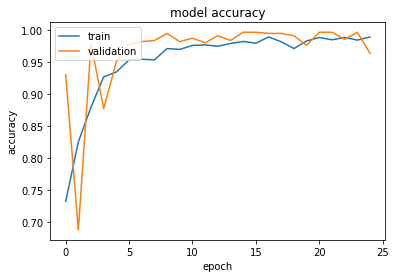

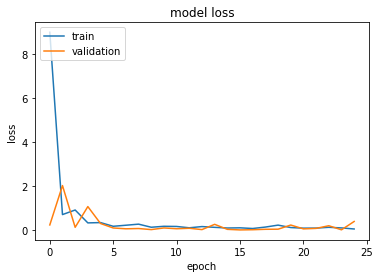

In [115]:
def LearningCurve(history):
# summarize history for accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()
# summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()
LearningCurve(history)
#Save the trained model to a file 
model_weight_file='/content/drive/MyDrive/MyCNN/inceptionV3_Metal.h5'
model.save(model_weight_file)

In [107]:
history

In [ ]:
# We take the ceiling because we do not drop the remainder of the batch
import math
compute_steps_per_epoch = lambda x: int(math.ceil(1. * x / batch_size))
test_steps = compute_steps_per_epoch(test_size)
test_generator = test_datagen.flow_from_directory(
                 test_path,
                 target_size=target_size, 
                 batch_size=batch_size,
                 class_mode=None,
                 shuffle=False)
test_generator.reset()
#Calling the saved model for making predictions
tl_img_aug_cnn = load_model(model_weight_file)
pred=tl_img_aug_cnn.predict(test_generator,
                            verbose=1,
                            steps=test_steps)
predicted_class_indices=np.argmax(pred,axis=1)
labels = (test_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
#create a function for visualizing model performance
import seaborn as sns
def PerformanceReports(conf_matrix,class_report,labels):
    ax= plt.subplot()
    sns.heatmap(conf_matrix, annot=True,ax=ax)
    #labels, title and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)
    plt.show()
    ax= plt.subplot()
    sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T,  
                annot=True,ax=ax)
    ax.set_title('Classification Report')
    plt.show()
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
labels=['A','B','C','D']
test_labels = [fn.split('/')[0] for fn in filenames]
cm=confusion_matrix(test_labels,predictions)
print(cm)
cr=classification_report(test_labels, predictions)
class_report=classification_report(test_labels, predictions,
                                   target_names=labels,
                                   output_dict=True)
print(cr)
PerformanceReports(cm,class_report,labels)